In [88]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## AND

In [90]:
x_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0,0,0,1])

In [91]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_and, y_and)

Perceptron()

In [92]:
perceptron.predict(x_and)

array([0, 0, 0, 1])

## XOR

In [93]:
x_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0,1,1,0])

In [94]:
perceptron.fit(x_xor, y_xor)

Perceptron()

In [95]:
perceptron.predict(x_xor)

array([0, 0, 0, 0])

In [96]:
from sklearn.neural_network import MLPClassifier

In [97]:
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh')

In [98]:
mlp.fit(x_xor, y_xor)

C:\Users\Bane6\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(2,))

In [99]:
mlp.predict(x_xor)

array([0, 0, 0, 0])

In [100]:
mlp.coefs_

[array([[-0.20110551, -0.70073067],
        [ 0.8912022 , -0.97302715]]),
 array([[-0.89128213],
        [-0.29164978]])]

In [101]:
mlp.intercepts_

[array([-1.22003346, -0.24801948]), array([-1.00895048])]

*How can we adapt our model to work with more complex problems?* Add more hidden layers

Adding more layers may not guarantee solution will converge, so need to add more iterations aswell

Default number of iterations is 1000; increasing # of iterations by a factor of 10

In [102]:
mlp = MLPClassifier(hidden_layer_sizes=(5, 2,), activation='tanh', max_iter = 10000)

In [103]:
mlp.fit(x_xor, y_xor)

MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 2), max_iter=10000)

In [104]:
mlp.predict(x_xor)

array([0, 1, 1, 0])

In [105]:
mlp.coefs_

[array([[-1.84875463, -0.47250396,  1.91108527,  1.56600908,  1.52185464],
        [ 1.82263773, -0.20830065, -1.23306006,  0.9354156 , -1.34999019]]),
 array([[ 1.29080671, -0.74708862],
        [-0.40653286,  0.05651214],
        [-0.94731681,  1.2893811 ],
        [ 1.08625059, -0.4960965 ],
        [ 1.99953728, -1.76800957]]),
 array([[ 1.72448396],
        [-1.96839279]])]

In [106]:
mlp.intercepts_

[array([-1.19048722, -1.13547918,  0.66368345,  0.21716316, -0.84866056]),
 array([ 0.70381436, -1.27284569]),
 array([0.01601544])]

Now, how can we simplify the MLP model? (ie. basic input values, model overly too complex, simplify the algo)

We can use **scaling**, scale via standardization so that the input values have a mean=0 and sd=1

In this example, our input values are in the range from 0 to 1 so scaling wouldn't have much effect

**StandardScalar** is used to standardize features by removing the mean and scaling to unit variance. 

If the values of the features are close to each other, there are more chances for the algorithm to get trained well and faster compared to when the features have high differences to each other will take more time to understand the data and the accuracy will be lower.

So in the case when data points happen to be far away from each other, scaling is a technique used to make data points closer to each other (ie. making data points generalised so that the distance between them is lower)

Larger differences between data points in the input variables increase uncertainty in the results of the model.

ML models are sensitive when the data is not scaled.

Algorithms that can be used to scale the data:
1. **Data Normalization using MinMaxScalar()**
2. **Data Standardization using StandardScalar()**

**1. Data Normalization using MinMaxScalar()**

Scaling technique used so that **data points are shifted and scaled to be within the range of 0 to 1**, so that data points are closer together.

*When to use Normalization?* An algorithm that doesn't follow the Gaussian distribution or doesn't count on the distribution of the data itself like KNN and K-means.

**2. Data Standardization using StandardScalar()**

Makes data points centered about the mean of all the data points presented in the feature w/ unit standard deviation. This means **mean=0 and sd=1**.

*When to use Standardization?* Data follows the Gaussian distribution (known as the Normal distribution)

Therefore, we need to standardize the dataset so that features with higher than normal values don't start dominating the dataset and increase the uncertainty in the results of our model, and therefore invalidating the results of our data and the interpretation of it. 

In order to make our results reproducible, we need to set a random_state (similar to `set.seed()` in R)

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(2,), max_iter=10000, random_state=102))

In [118]:
clf.fit(x_xor, y_xor)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(2,), max_iter=10000,
                               random_state=102))])

In [119]:
clf.predict(x_xor)

array([0, 1, 1, 0])

1. Working with ANN, lots of parameters will be changed on the regular and at different times, so we need a way of documenting our process, what we have done and what parameters have changed, so that way we're not repeating experiments. 
2. We need to have a good understanding of all the different parameters and coefficients of the classifier

In [121]:
MLPClassifier?

## Simple Robust Approach

Can check all the functions inside a module by first importing, then doing something like so `sklearn.tree.*?`

In [125]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_xor, y_xor)

DecisionTreeClassifier()

In [123]:
clf.predict(x_xor)

array([0, 1, 1, 0])

*In favour of using simpler solutions (ie. decision tree > MLP) if a problem calls for it*

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.25, 0.5, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

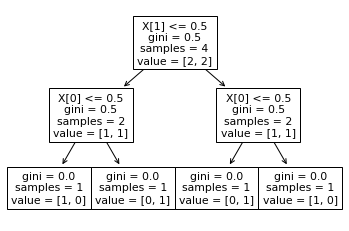

In [132]:
from sklearn.tree import plot_tree

plot_tree(clf)